# 来画图和数据展示

本note目的在于画出一二级市场价格差的散点图和其他相关数据

* 价格差的散点图
* 地理位置分布图





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## 散点图

# load data
path='F:\\DATAbase\\land\\HDF\\'
fm_match=pd.read_excel(path+'match_fm.xlsx')
sm_match=pd.read_excel(path+'match_sm.xlsx')

In [3]:
# 数据预先处理
fm_match['p_a']=fm_match['price']/fm_match['area']

sm_match['p_a']=sm_match['price']/sm_match['area']

# print(fm_match.head())
# print(sm_match.head())

           address   area  level location  lyear  mindex  mkey_1  plot_ratio  \
0        霸州市堂二里镇九街  18309      1      霸州市     50   38010  1|967-         1.2   
1       霸州市堂二里镇格达村  20204      1      霸州市     50   38043  1|967-         1.2   
2        霸州市胜芳镇前进街  81431      1      霸州市     50   38054  1|967-         1.2   
3      霸州市煎茶铺镇郝青口村   3718      1      霸州市     50   38804  1|967-         1.2   
4  霸州市辛章办辛五村、协同路南侧   4388      2      霸州市     50   38815  2|967-         1.2   

   price       p_a  
0    536  0.029275  
1    583  0.028856  
2   2978  0.036571  
3    107  0.028779  
4    131  0.029854  
   mindex  level                                             mkey_1 location  \
0     189      0  0|34497-0|34501-0|34506-0|317178-0|320315-0|32...      平山县   
1     967      2  2|38815-2|38827-2|38859-2|312950-2|314168-2|31...      霸州市   
2     826      0  0|165-0|1133-0|1264-0|1265-0|1266-0|1317-0|131...      东至县   
3       6      2                                 2|328026-2|331277-      

In [79]:
sm_match=sm_match[sm_match['level']>=1]

In [15]:
# fm_match=fm_match[fm_match['level']>0]
# fm_match=fm_match.reset_index()
# fm_match.drop('index')
print(fm_match.head())
print(sm_match.head())

# fm_match.head()

   level_0  index          address    area  level location  lyear  mindex  \
0        0     17        霸州市堂二里镇九街  1.8309      1      霸州市     50   38010   
1        1     18       霸州市堂二里镇格达村  2.0204      1      霸州市     50   38043   
2        2     19        霸州市胜芳镇前进街  8.1431      1      霸州市     50   38054   
3        3     20      霸州市煎茶铺镇郝青口村  0.3718      1      霸州市     50   38804   
4        4     21  霸州市辛章办辛五村、协同路南侧  0.4388      2      霸州市     50   38815   

     mkey_1  mkey_2  mkey_3  plot_ratio  price  
0  1|00967-     NaN     NaN         1.2    536  
1  1|00967-     NaN     NaN         1.2    583  
2  1|00967-     NaN     NaN         1.2   2978  
3  1|00967-     NaN     NaN         1.2    107  
4  2|00967-     NaN     NaN         1.2    131  
               address         area  level location  lyear  mindex  \
0  位于平山县大吾煤炭园区，属于储煤场用地     93333.80      0      平山县     46     189   
1             霸州市辛章一号路     33333.50      2      霸州市     50     967   
2               张溪镇火花村     31333.

In [80]:
sm_group=sm_match.groupby('location')
fm_group=fm_match.groupby('location')

In [81]:
len(fm_group.location)

120

In [82]:
len(sm_group.p_a)

120

In [83]:
p_a_df=sm_group.p_a.mean()
p_a_df=pd.DataFrame(p_a_df)
p_a_df=p_a_df.rename(columns={'p_a':'p_a_sm'})
p_a_df=pd.concat([p_a_df,fm_group.p_a.mean()],axis=1)
p_a_df=p_a_df.rename(columns={'p_a':'p_a_fm'})
p_a_df

,p_a_sm,p_a_fm
location,,
三河市,0.239999,0.036542
东台市,0.060918,0.017152
临朐县,0.009943,0.018400
义马市,0.018000,0.016023
井陉县,0.030000,0.026696
京山县,0.000067,0.009714
从化市,0.103198,0.036149
会泽县,0.011429,0.034500
余杭区,0.167082,0.065559


In [57]:
p_a_df['p_a_fm'].fillna('-',inplace=True)
p_a_df=p_a_df[p_a_df['p_a_fm'].str.contains('-')!=True]

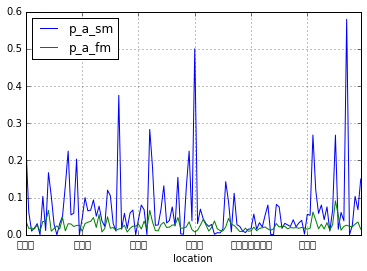

In [84]:
# p_a_df.plot(x=p_a_df.index,y=p_a_df[['p_a_sm','p_a_fm']],kind='scatter')
p_a_df.plot()